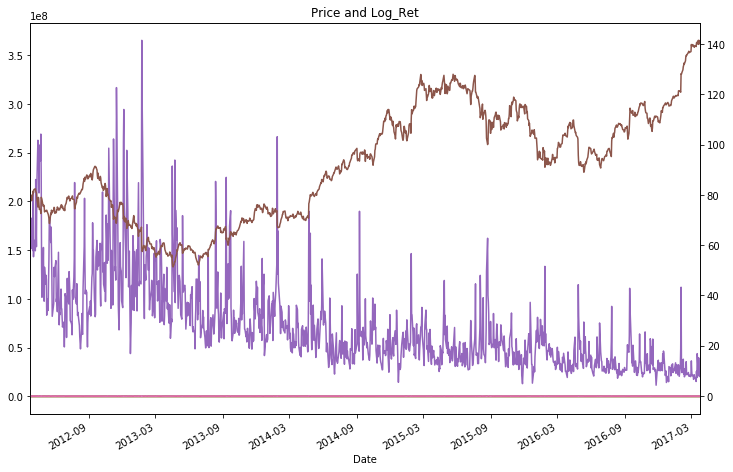

In [13]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import datetime
from pandas_datareader import data, wb # pip install pandas-datareader

start = datetime.date(2012, 3, 25)
end = datetime.date(2017, 3, 25)

# Reading in Yahoo Finance data with DataReader
df = data.DataReader('AAPL', 'yahoo', start, end)

#Point 01: Implement one feature and visualize the price and feature in same graph

# Get the percentage change from out first value to our second
df['Log_Ret'] = np.log(df["Adj Close"] / df["Adj Close"].shift(1))

plt.figure()
df.plot(secondary_y= ['Adj Close', 'Log_Ret'], figsize=(12,8), title="Price and Log_Ret", legend=False)
plt.show()    





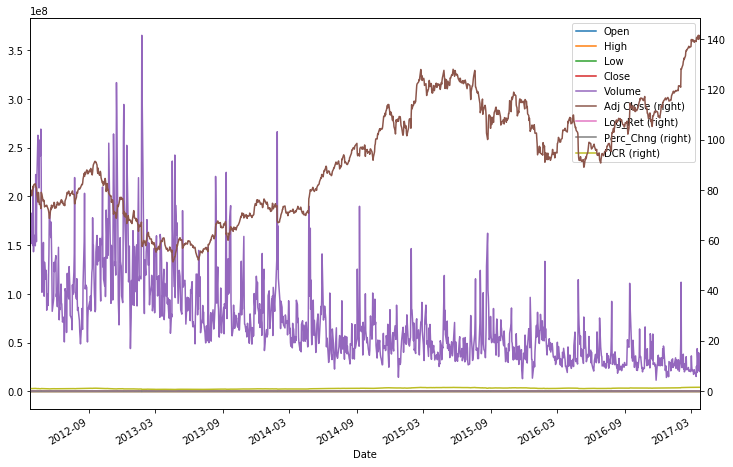

In [14]:
#Point 2: Add two more features
# Auto Percent change function
df["Perc_Chng"] = df["Adj Close"].pct_change()

#Fill ZEROS instead of NaN values
df.fillna(0, inplace=True)

#Daily cummulative returns
df["DCR"] = (1 + df["Log_Ret"]).cumprod()
    
plt.figure()
df.plot(secondary_y= ['Adj Close', 'Log_Ret','Perc_Chng', 'DCR'], figsize=(12,8))
plt.show()

In [15]:
#Type 1 features

#ROC for 05 days
df["ROC"] = (df["Adj Close"]/(df["Adj Close"]- df["Adj Close"].shift(5)) *100)

#Momentum
df["Momentum"] = df["Adj Close"]- df["Adj Close"].shift(4)



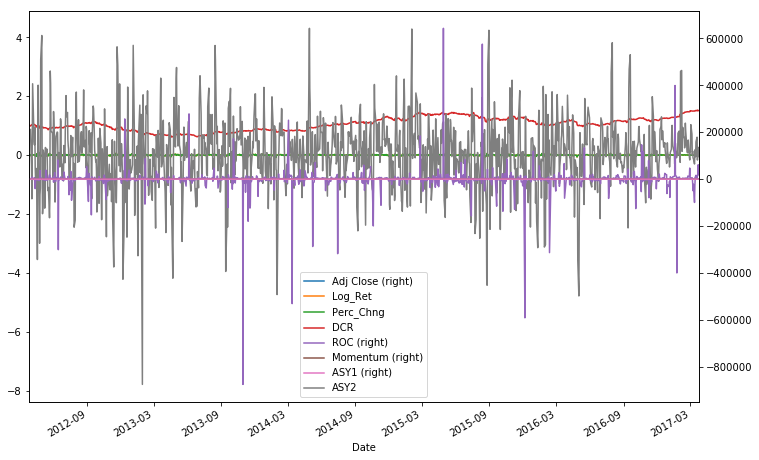

In [16]:
#Type 2 variable ASY1
SY = (np.log(df["Adj Close"]) - (np.log(df["Adj Close"]).shift(1)))*100
df["ASY1"] = SY.shift(1)

#Type 2 variable ASY2
df["ASY2"] = (SY.shift(2) + SY.shift(3))/2

# Drop the columns we dont want to use as features
df.drop(["Open", "High", "Low", "Volume", "Close"], axis=1, inplace=True)

plt.figure()
df.plot(secondary_y= ['Adj Close', 'ROC','Momentum', 'ASY1'], figsize=(12,8))
plt.show()

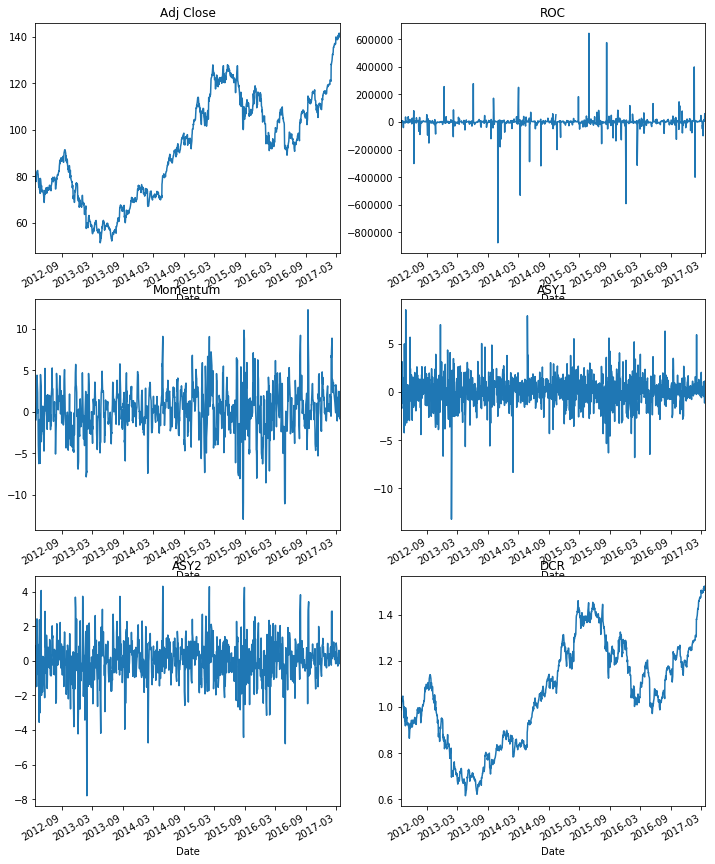

In [17]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 16))
df['Adj Close'].plot(ax=axes[0,0]); axes[0,0].set_title('Adj Close')
df['ROC'].plot(ax=axes[0,1]); axes[0,1].set_title('ROC')
df['Momentum'].plot(ax=axes[1,0]); axes[1,0].set_title('Momentum')
df['ASY1'].plot(ax=axes[1,1]); axes[1,1].set_title('ASY1')
df['ASY2'].plot(ax=axes[2,0]); axes[2,0].set_title('ASY2')
df['DCR'].plot(ax=axes[2,1]); axes[2,1].set_title('DCR')
plt.show()
